Eugénie DULOUT et Jean LUCAS

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.tsa.stattools as tools
import statsmodels.graphics.tsaplots as tsa
import statsmodels

Q1

In [120]:
df = pd.read_excel('quarterly_projet.xls')

df.dropna()

,DATE,FFR,Tbill,Tb1yr,r5,r10,PPINSA,Finished,CPI,CPICORE,M1NSA,M2SA,M2NSA,Unemp,IndProd,RGDP,Potent,Deflator,Curr
0,1960Q1,3.93,3.87,4.57,4.64,4.49,31.67,33.20,29.40,18.92,140.53,896.1,299.40,5.13,23.93,2845.3,2824.2,18.521,31.830
1,1960Q2,3.70,2.99,3.87,4.30,4.26,31.73,33.40,29.57,19.00,138.40,903.3,300.03,5.23,23.41,2832.0,2851.2,18.579,31.862
2,1960Q3,2.94,2.36,3.07,3.67,3.83,31.63,33.43,29.59,19.07,139.60,919.4,305.50,5.53,23.02,2836.6,2878.7,18.648,32.217
3,1960Q4,2.30,2.31,2.99,3.75,3.89,31.70,33.67,29.78,19.14,142.67,932.8,312.30,6.27,22.47,2800.2,2906.7,18.700,32.624
4,1961Q1,2.00,2.35,2.87,3.64,3.79,31.80,33.63,29.84,19.17,142.23,948.9,317.10,6.80,22.13,2816.9,2934.8,18.743,32.073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,2011Q4,0.07,0.01,0.11,0.95,2.05,200.77,192.97,226.97,112.50,2165.77,28787.3,9599.47,8.67,95.33,13441.0,14255.9,113.987,1055.496
208,2012Q1,0.10,0.07,0.16,0.90,2.04,202.17,193.73,228.27,113.12,2213.97,29238.6,9777.03,8.27,96.70,13506.4,14317.4,114.599,1082.519
209,2012Q2,0.15,0.09,0.19,0.79,1.82,201.80,192.83,228.84,113.60,2258.30,29611.6,9888.97,8.17,97.27,13548.5,14379.3,115.035,1104.500
210,2012Q3,0.14,0.10,0.18,0.67,1.64,202.40,195.20,230.03,113.91,2326.47,30251.4,10029.87,8.03,97.39,13652.5,14441.9,115.810,1119.187


Q2

Text(0.5, 1.0, 'Interest rate')

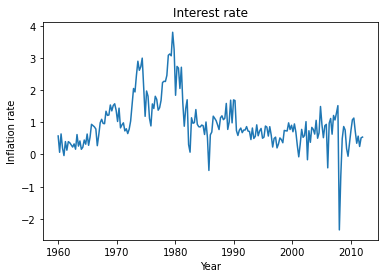

In [121]:
inf = [100*(df.iloc[i]['CPI']-df.iloc[i-1]['CPI'])/df.iloc[i]['CPI'] for i in range(1,len(df))]
years = np.linspace(1960,2012,211)

plt.plot(years, inf)
plt.xlabel('Year')
plt.ylabel('Inflation rate')
plt.title("Interest rate")

L'inflation augmente globalement jusqu'en 1981, puis elle diminue jusqu'à la crise financière de 2008.

Q3

/Users/eugeniedulout/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
/Users/eugeniedulout/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


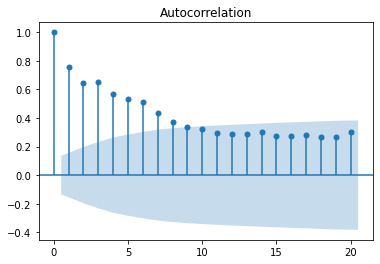

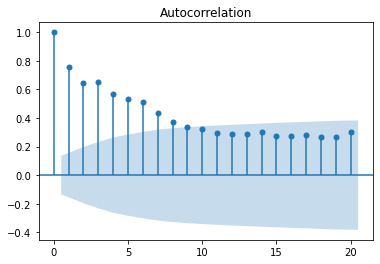

In [122]:
tools.acf(inf)
tsa.plot_acf(inf, lags=20)

/Users/eugeniedulout/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1024: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs // 2 - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(


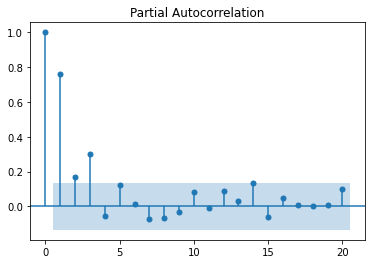

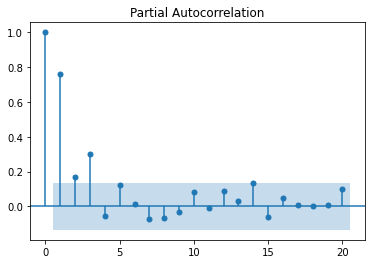

In [123]:
tools.pacf(inf)
tsa.plot_pacf(inf, lags=20)

L'autocorrelation d'un processus ARMA(p,q) tend exponentiellement vers 0 à partir de l'ordre q+1. Ce comportement est semblable à celui suivi par l'inflation, et on a donc q=3.  De plus, l'autocorrélation partielle se trouve dans la zone bleu ou elle oscille autour de 0 à partir d'un certain rang. La série temporelle n'est donc pas stationnaire.


Q4

Stationnarité: Un processus stationnaire est un processus stochastique dans lequel les v.a. suivent toutes la même loi.



Ergodicité:

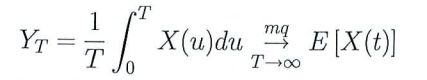

Ces conditions sont nécessaires pour assurer la convergence de la régression linéaire.

Q5

/Users/eugeniedulout/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN

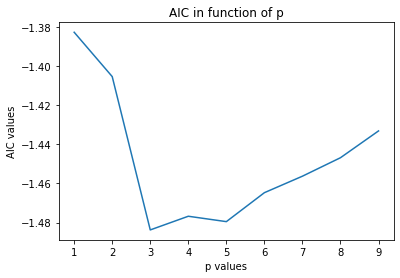

L'AIC est minimum pour p=3, c'est donc un processus AR(3)


In [124]:
import statsmodels.tsa.api as smt
l_aic = []
pval = np.arange(1,10)
for p in pval:
    mdl = smt.AR(inf).fit(maxlag=p)
    l_aic.append(mdl.aic)
plt.plot(pval, l_aic)
plt.ylabel("AIC values")
plt.xlabel("p values")
plt.title('AIC in function of p')
plt.show()
print("L'AIC est minimum pour p=3, c'est donc un processus AR(3)")

Q6

                            OLS Regression Results                            
Dep. Variable:                  Unemp   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                  0.008229
Date:                Sun, 21 Nov 2021   Prob (F-statistic):              0.928
Time:                        22:23:57   Log-Likelihood:                -400.28
No. Observations:                 211   AIC:                             804.6
Df Residuals:                     209   BIC:                             811.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.0735      0.182     33.388      0.0

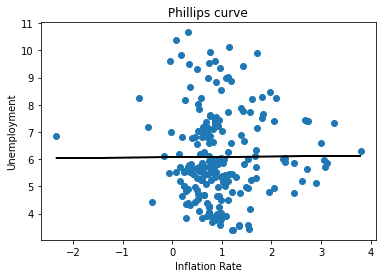

In [125]:
Unemp = df['Unemp'].iloc[1:]

unemp_results = statsmodels.api.OLS(Unemp, np.column_stack((np.ones(len(inf)),inf))).fit()
print(unemp_results.summary())

list = []
for i in inf:
    list.append(unemp_results.params[0] + unemp_results.params[1] * i)
plt.scatter(inf,Unemp)
plt.plot(inf, list, color='black')
plt.xlabel("Inflation Rate")
plt.ylabel("Unemployment")
plt.title("Phillips curve")
plt.show()

Q7

On plot les résidus du modèle.

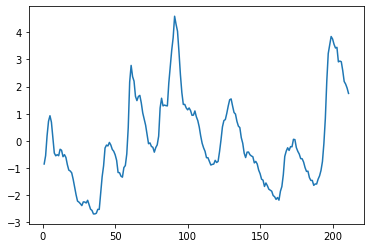

In [126]:
unemp_resid = unemp_results.resid
plt.plot(unemp_resid)

On étudie l'autocorrélation des résidus. Pour cela on fait un test d'autocorrélation H0: p=0

In [127]:
x = np.column_stack((np.ones(len(inf)-1),unemp_resid[0:len(inf)-1]))[:,1]
y = unemp_resid[1:len(inf)]
results = statsmodels.api.OLS(x,y).fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.956
Model:                            OLS   Adj. R-squared (uncentered):              0.956
Method:                 Least Squares   F-statistic:                              4565.
Date:                Sun, 21 Nov 2021   Prob (F-statistic):                   5.77e-144
Time:                        22:23:58   Log-Likelihood:                         -69.784
No. Observations:                 210   AIC:                                      141.6
Df Residuals:                     209   BIC:                                      144.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

La p-valeur est nulle, on rejette donc le test. Les erreurs sont autocorellées, il faut corriger.

Q8

On corrige l’autocorrélation des erreurs.

In [128]:
Unemp_corrected = [Unemp[i]-results.params[0]*Unemp[i-1] for i in range(2,len(Unemp+1))]
x = np.column_stack((np.ones(len(inf)),inf))
x_corrected = x[1:] - results.params[0]*x[0:len(x)-1]
inf_corrected = x_corrected[:,1]

Q9

On sépare en deux parties, avant et après la moitié de la période d’observation.

In [129]:
Unemp_1 = Unemp[0:105]
Unemp_2 = Unemp[106:210]
x1 = x[0:105]
x2 = x[106:210]
inf_1 = inf[0:105]
inf_2 = inf[106:210]

Premier SSR:

In [130]:
res0 = api.OLS(Unemp, x).fit()
u0 = res0.resid
SSR = u0.T@u0

Deuxième SSR:

In [131]:
res1 = api.OLS(Unemp_1, x1).fit()
u1 = res1.resid
SSR1 = u1.T@u1

Troisième SSR:

In [132]:
res2 = api.OLS(Unemp_2, x2).fit()
u2 = res2.resid
SSR2 = u2.T@u2

In [133]:
F = ((SSR-(SSR1+SSR2))/(SSR1+SSR2))*(len(inf)-8)/4
p = stats.f.sf(F,1,len(inf)-2)
print('SSR=',SSR,'SSR1=',SSR1,'SSR2=',SSR2)
print("La p-valeur : ", p)

SSR= 548.9903905121405 SSR1= 300.53602698671216 SSR2= 234.66519435565817
La p-valeur :  0.25414746341084193


La p-valeur est plus importante, le test est stable.

Q10

In [134]:
#On rajoute les délais d'ordre 1, 2 , 3, 4
n_unemp = len(Unemp)
Unemp_0 = Unemp[0:n_unemp-4]
Unemp_1 = Unemp[1:n_unemp-3]
Unemp_2 = Unemp[2:n_unemp-2]
Unemp_3 = Unemp[3:n_unemp-1]
n_inf = len(inf)
inf0 = inf[0:n_inf-4]
inf1 = inf[1:n_inf-3]
inf2 = inf[2:n_inf-2]
inf3 = inf[3:n_inf-1]

const = np.ones(n_unemp-4)
x = np.column_stack((const,inf0, inf1, inf2, inf3, Unemp_0, Unemp_1, Unemp_2, Unemp_3))
results = api.OLS(Unemp[4:], x).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Unemp   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     1143.
Date:                Sun, 21 Nov 2021   Prob (F-statistic):          3.10e-161
Time:                        22:24:01   Log-Likelihood:                 4.5455
No. Observations:                 207   AIC:                             8.909
Df Residuals:                     198   BIC:                             38.90
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1454      0.072      2.007      0.0

Test de Granger:

In [135]:
print(tools.grangercausalitytests(np.column_stack((Unemp, inf)),4))


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=8.3578  , p=0.0042  , df_denom=207, df_num=1
ssr based chi2 test:   chi2=8.4790  , p=0.0036  , df=1
likelihood ratio test: chi2=8.3123  , p=0.0039  , df=1
parameter F test:         F=8.3578  , p=0.0042  , df_denom=207, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.1538  , p=0.0171  , df_denom=204, df_num=2
ssr based chi2 test:   chi2=8.5112  , p=0.0142  , df=2
likelihood ratio test: chi2=8.3424  , p=0.0154  , df=2
parameter F test:         F=4.1538  , p=0.0171  , df_denom=204, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=4.9417  , p=0.0025  , df_denom=201, df_num=3
ssr based chi2 test:   chi2=15.3415 , p=0.0015  , df=3
likelihood ratio test: chi2=14.8021 , p=0.0020  , df=3
parameter F test:         F=4.9417  , p=0.0025  , df_denom=201, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=3.7430  , p=0.0058  

Q11

                            OLS Regression Results                            
Dep. Variable:                  Unemp   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     4.820
Date:                Sun, 21 Nov 2021   Prob (F-statistic):           0.000982
Time:                        22:24:03   Log-Likelihood:                -384.94
No. Observations:                 207   AIC:                             779.9
Df Residuals:                     202   BIC:                             796.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6859      0.195     29.231      0.0

Text(0.5, 1.0, 'Délais distribués')

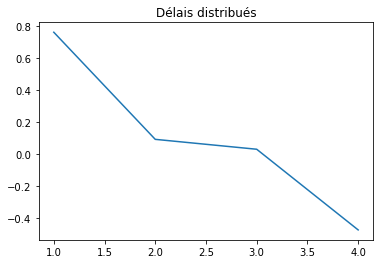

In [136]:
x = np.column_stack((const, inf0, inf1, inf2, inf3))
results = api.OLS(Unemp[4:], x).fit()
print(results.summary())
plt.plot([1,2,3,4], results.params[1:])
plt.title("Délais distribués")

In [137]:
print("L'impact à long terme de l’inflation sur le chômage est de:", results.params[1:].sum()*100, "%")

L'impact à long terme de l’inflation sur le chômage est de: 41.15788466359076 %
